In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')
teams_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructor_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')


In [4]:
teams.drop(columns=['url','nationality'], inplace=True)

In [5]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

In [6]:
races  = races[races['year'] == 2022]

In [7]:
teams_standings = teams_standings[teams_standings['raceId'].isin(races['raceId'])]

In [8]:
teams_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
12706,28142,1074,9,0.0,10,10,0
12707,28141,1074,1,0.0,9,9,0
12708,28140,1074,3,0.0,8,8,0
12709,28139,1074,117,0.0,7,7,0
12710,28138,1074,213,4.0,6,6,0
...,...,...,...,...,...,...,...
12816,28248,1084,213,27.0,8,8,0
12817,28249,1084,117,18.0,9,9,0
12818,28250,1084,3,3.0,10,10,0
12819,28251,1084,1,81.0,4,4,0


In [9]:
team_names = teams.set_index('constructorId')

In [10]:
teams_standings['Team'] = teams_standings['constructorId'].replace(team_names['name'])

In [11]:
race_names = races.set_index('raceId')['name'].to_dict()
teams_standings['Race Name'] = teams_standings['raceId'].replace(race_names)
teams_standings.reset_index(inplace=True)
teams_standings.sort_values(by='raceId')


,index,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team,Race Name
0,12706,28142,1074,9,0.0,10,10,0,Red Bull,Bahrain Grand Prix
1,12707,28141,1074,1,0.0,9,9,0,McLaren,Bahrain Grand Prix
2,12708,28140,1074,3,0.0,8,8,0,Williams,Bahrain Grand Prix
3,12709,28139,1074,117,0.0,7,7,0,Aston Martin,Bahrain Grand Prix
4,12710,28138,1074,213,4.0,6,6,0,AlphaTauri,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
104,12815,28247,1084,214,81.0,5,5,0,Alpine F1 Team,Austrian Grand Prix
105,12816,28248,1084,213,27.0,8,8,0,AlphaTauri,Austrian Grand Prix
106,12817,28249,1084,117,18.0,9,9,0,Aston Martin,Austrian Grand Prix
107,12818,28250,1084,3,3.0,10,10,0,Williams,Austrian Grand Prix


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


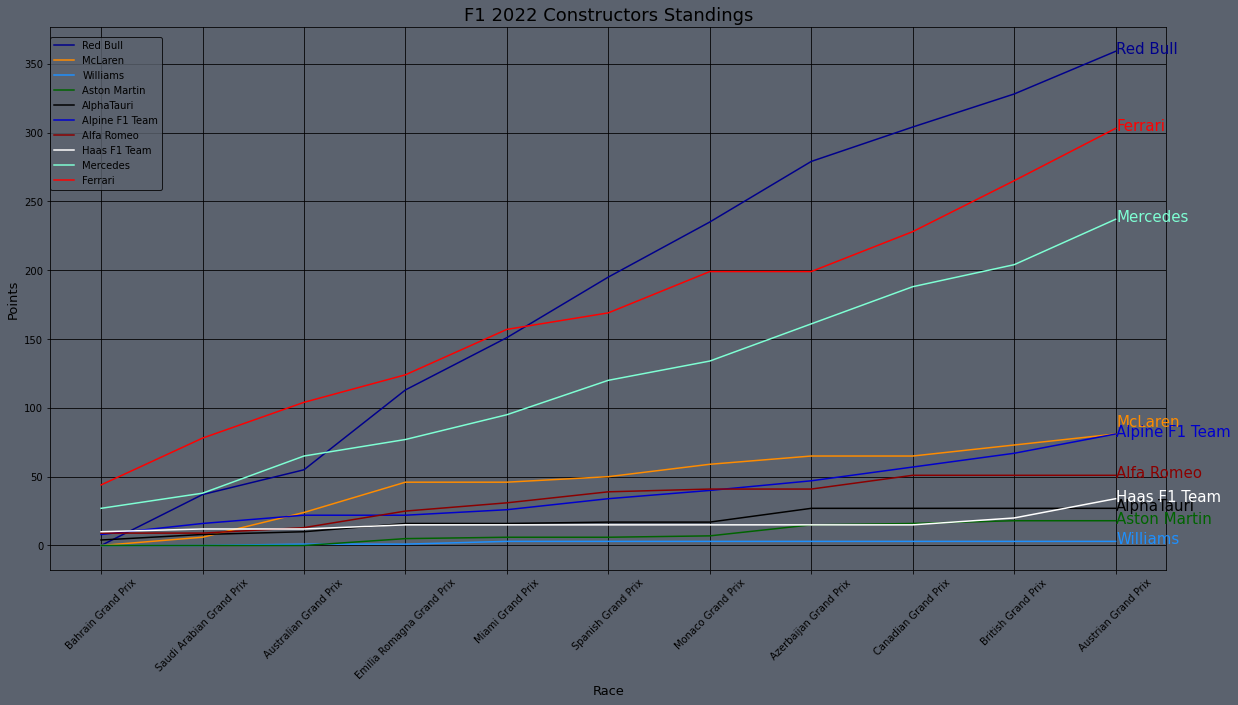

In [33]:

fig =  plt.figure( figsize=(20,10))

colors=['darkblue', 'darkorange', 'dodgerblue', 'darkgreen', 'black','mediumblue', 'darkred', 'white', 'aquamarine', 'red']


ax = sns.lineplot(teams_standings['Race Name'], teams_standings['points'],hue=teams_standings['Team'], palette=colors,markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(-.0001, .7))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Constructors Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)



x = 0
for line, name in zip(ax.lines, teams_standings['Team']):
    y = line.get_ydata()[-1]
    if name == 'McLaren': 
        ax.annotate(name, xy=(1,y), xytext=(-50,12), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'McLaren': 
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 10:
        break







plt.grid(color ='black')
plt.show()